In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("D:/junotbok/7th week/feature_engineering.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop(columns=['id', 'Unnamed: 32'], axis=1)

In [5]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
corr_matrix = df.corr()

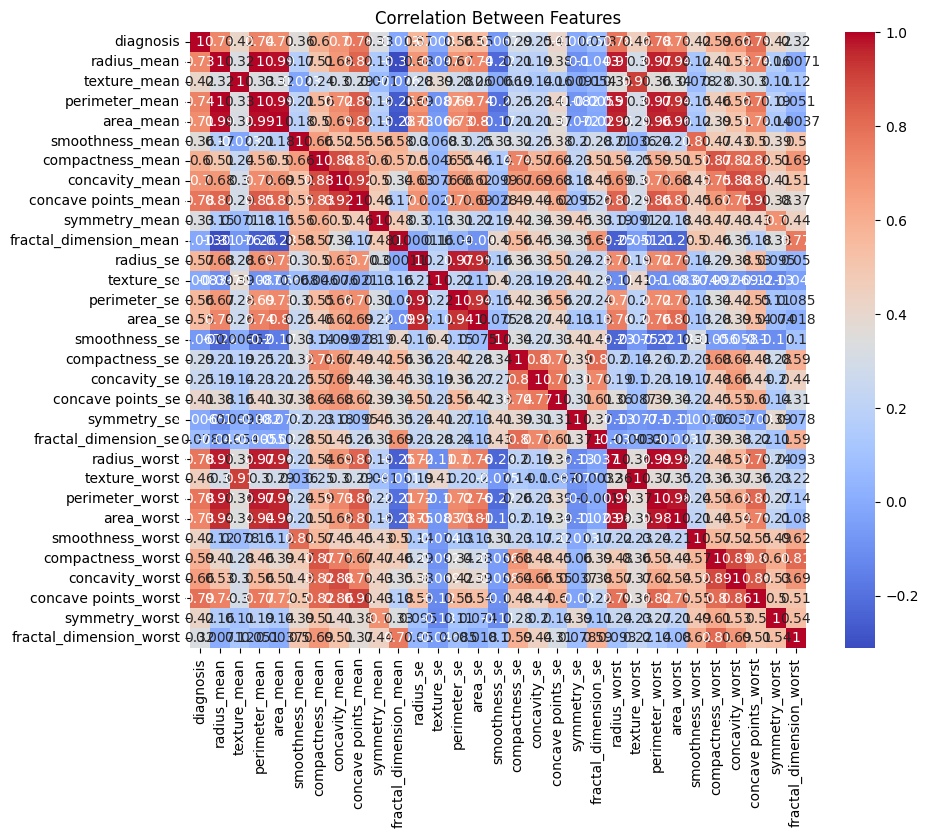

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Between Features')
plt.show()

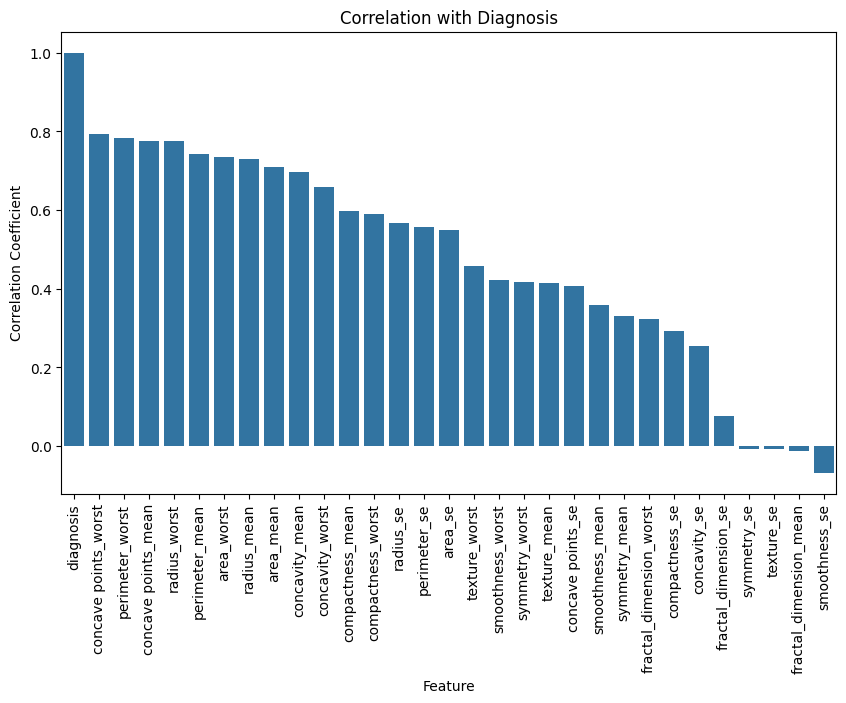

In [8]:
corr_with_diagnosis = df.corrwith(df['diagnosis']).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_diagnosis.index, y=corr_with_diagnosis.values)
plt.title('Correlation with Diagnosis')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

In [9]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

In [10]:

def create_pca_df(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    final_df = pd.concat([pca_df,Y],axis=1)
    return final_df

final_df = create_pca_df(X)

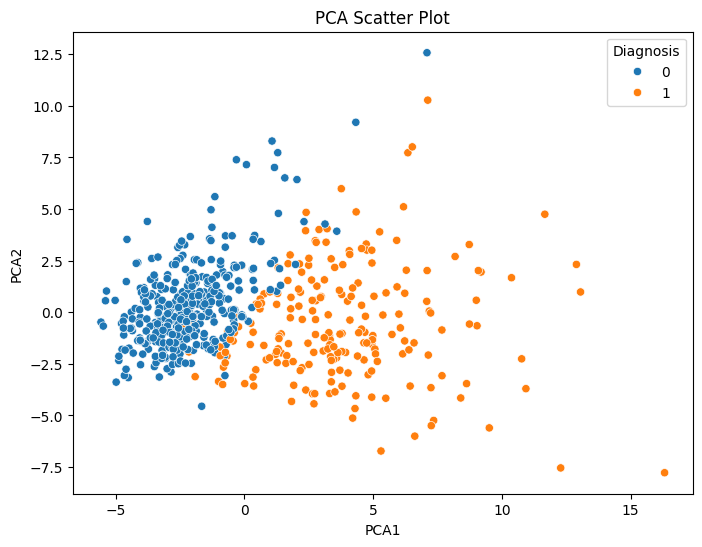

In [13]:
final_df['diagnosis'] = Y
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='diagnosis', data=final_df)
plt.title('PCA Scatter Plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Diagnosis')
plt.show()